In [3]:
#!pip install missingno

In [48]:
# Librerías necesarias
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer

In [49]:
######################################### 1. Carga de Datos

# Ubicación de la carpeta
b = 'C:\\Users\\kemendoz\\Desktop\\Curso\\Curso V2\\2.- PREPROCESAMIENTO DE LOS DATOS'
os.chdir(b)

In [50]:
# Descripción de las columnas (puedes omitirlo en Python, es solo un comentario)
"""
Emisiones de contaminantes atmosféricos por fuentes fijas, 2008 (Toneladas)
Contaminante
1) Estado_emergencia: Ciudades en estado de emergencia por contaminantes.
2) PM10: partículas iguales o menores a 10 micrómetros 
3) PM2.5: partículas iguales o menores a 2.5 micrómetros 
4) S02 : dióxido de azufre 
5) CO: monóxido de carbono
6) NOx: óxidos de nitrógeno 
7) COV: compuestos orgánicos volátiles 
8) NH3 : amoniaco 
9) CN: Carbono Negro
"""


'\nEmisiones de contaminantes atmosféricos por fuentes fijas, 2008 (Toneladas)\nContaminante\n1) Estado_emergencia: Ciudades en estado de emergencia por contaminantes.\n2) PM10: partículas iguales o menores a 10 micrómetros \n3) PM2.5: partículas iguales o menores a 2.5 micrómetros \n4) S02 : dióxido de azufre \n5) CO: monóxido de carbono\n6) NOx: óxidos de nitrógeno \n7) COV: compuestos orgánicos volátiles \n8) NH3 : amoniaco \n9) CN: Carbono Negro\n'

In [51]:
# Importar archivo
#data = pd.read_csv("Niveles de contaminacion.csv", sep=";", decimal=";", na_values=[""])
# Importar archivo con codificación latin1
data = pd.read_csv("Niveles de contaminacion.csv", sep=";", decimal=";", na_values=[""], encoding='latin1')
data.head(6)

,Estado,Numero_de_empresas,Estado_emergencia,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
0,Aguascalientes,0,SI,945,629.0,1814,235,843.0,1836,14.0,NaN
1,Baja California,588,NO,1978,1842.0,5588,6850,NaN,11692,254.0,NaN
2,Baja California Sur,27,NO,1028,752.0,22890,505,NaN,516,115.0,58.0
3,Campeche,39,SI,4527,3847.0,574973,8698,34132.0,3465,382.0,356.0
4,Coahuila,214,NO,5063,3083.0,54592,2510,4845.0,3419,912.0,812.0
5,Colima,34,NO,3360,NaN,33287,9505,11015.0,4741,264.0,137.0


In [52]:
#####################################  2. Exploración de los Datos

# Revisar la estructura de los datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estado              33 non-null     object 
 1   Numero_de_empresas  33 non-null     int64  
 2   Estado_emergencia   28 non-null     object 
 3   PM10                33 non-null     int64  
 4   PM2.5               30 non-null     float64
 5   SO2                 33 non-null     int64  
 6   CO                  33 non-null     int64  
 7   NOX                 25 non-null     float64
 8   COV                 33 non-null     int64  
 9   NH3                 31 non-null     float64
 10  CN                  23 non-null     float64
dtypes: float64(4), int64(5), object(2)
memory usage: 3.0+ KB
None


In [53]:
# Resumen estadístico de las columnas numéricas
print(data.describe())

       Numero_de_empresas          PM10         PM2.5            SO2  \
count           33.000000     33.000000     30.000000      33.000000   
mean           233.090909   6565.636364   4899.933333   67600.333333   
std            346.377356   7711.727059   5167.550857  109017.222432   
min              0.000000     40.000000    211.000000     286.000000   
25%             39.000000   2108.000000   1787.250000    5588.000000   
50%            129.000000   4556.000000   3543.500000   27144.000000   
75%            222.000000   8207.000000   5728.250000   86202.000000   
max           1569.000000  41938.000000  25779.000000  574973.000000   

                  CO            NOX           COV          NH3           CN  
count      33.000000      25.000000     33.000000    31.000000    23.000000  
mean    19171.636364   18707.280000   8096.242424   952.516129   641.347826  
std     34125.471294   31415.400186  10278.400976  1504.723959  1118.180040  
min       235.000000     512.000000    

In [54]:
# Filtrar solo columnas numéricas
data_numerico = data.select_dtypes(include=[np.number])


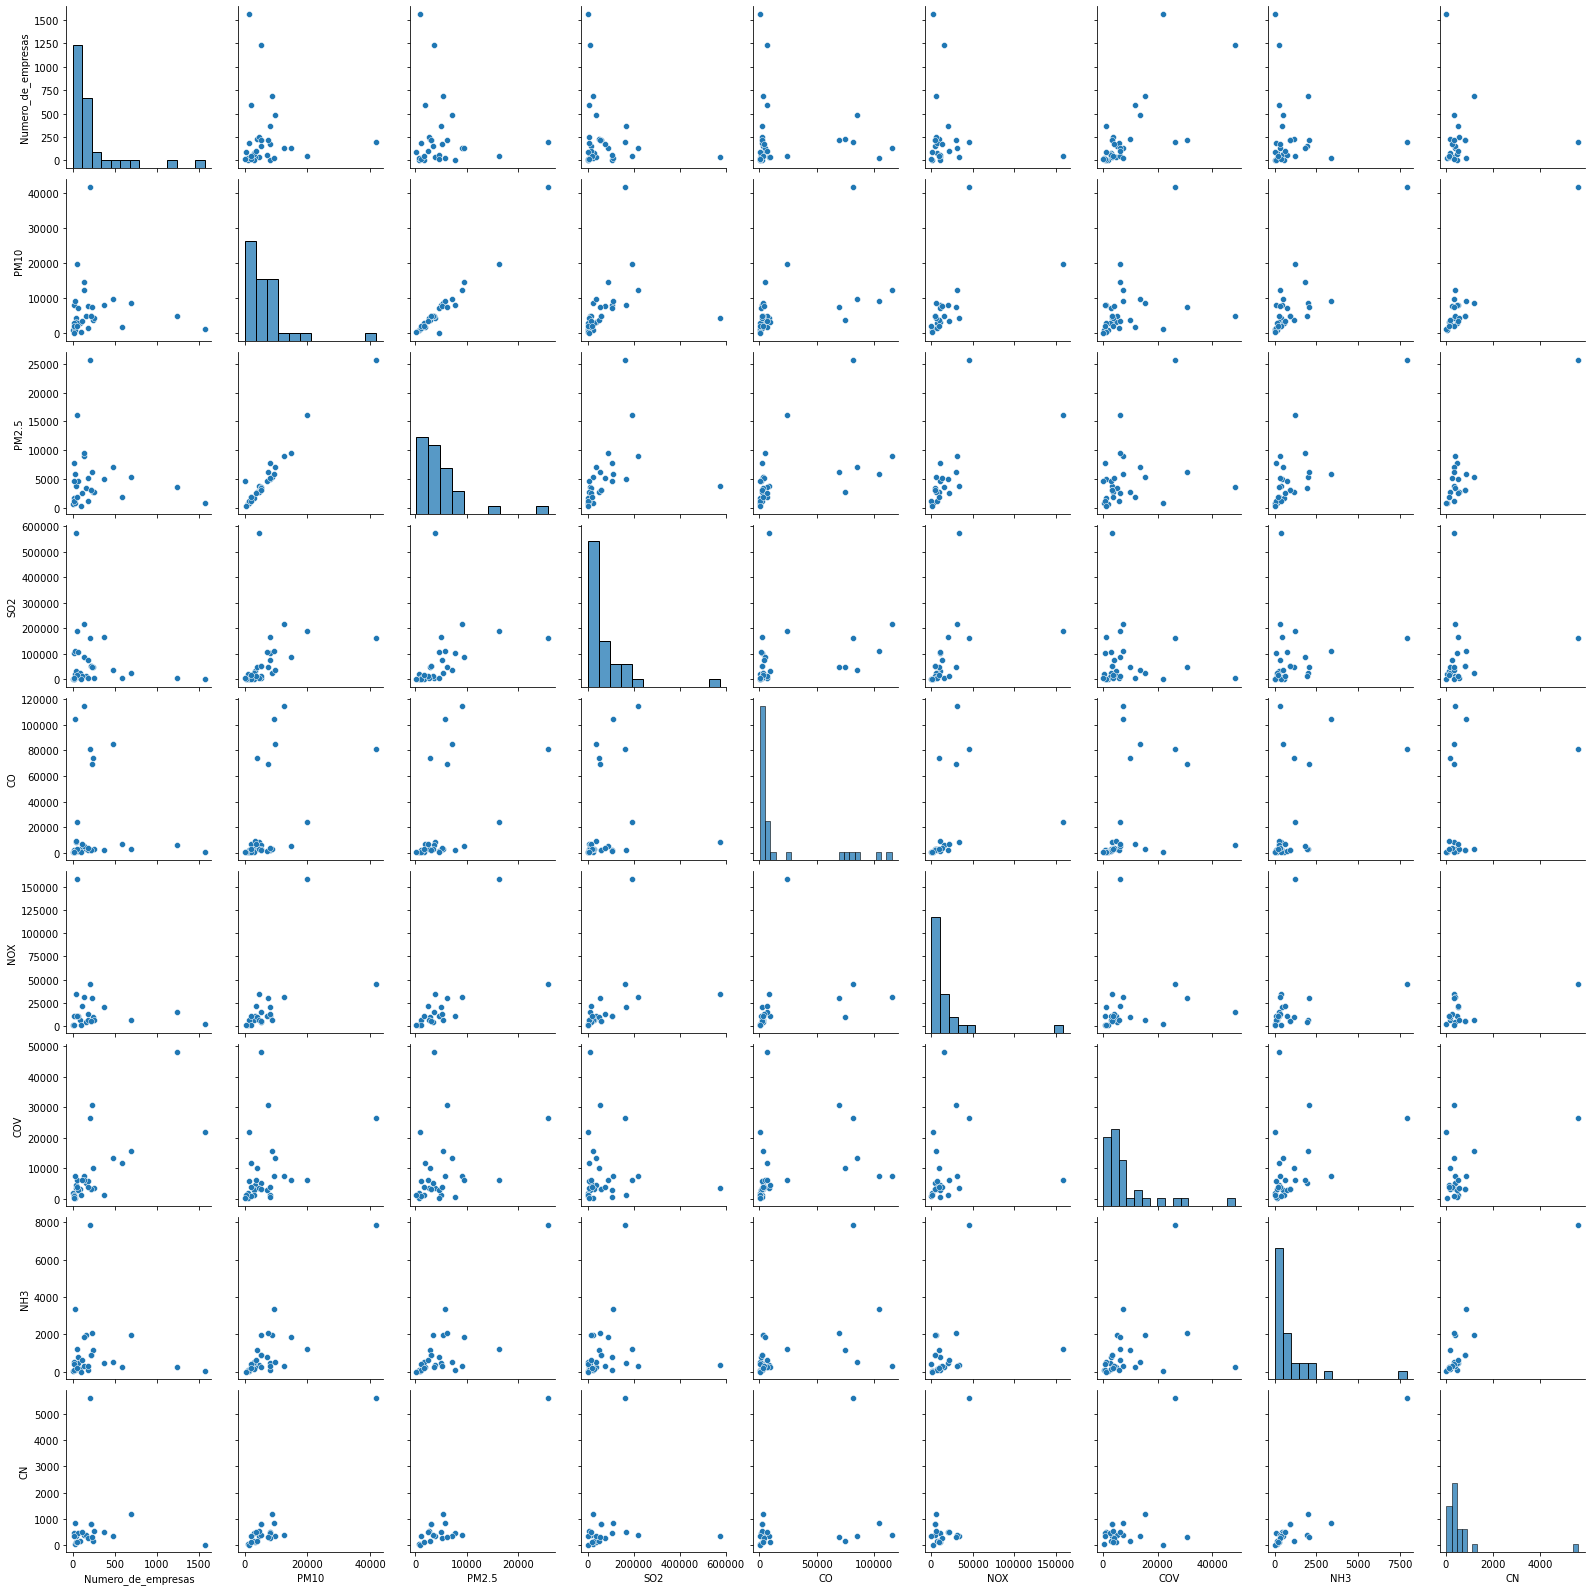

In [55]:
# Crear la matriz de dispersión
sns.pairplot(data_numerico)
plt.show()

In [56]:
# Correlación entre las variables numéricas
correlation_matrix = data_numerico.corr()
print(correlation_matrix)

                    Numero_de_empresas      PM10     PM2.5       SO2  \
Numero_de_empresas            1.000000 -0.047831 -0.113434 -0.191172   
PM10                         -0.047831  1.000000  0.975034  0.344520   
PM2.5                        -0.113434  0.975034  1.000000  0.361384   
SO2                          -0.191172  0.344520  0.361384  1.000000   
CO                           -0.047769  0.497296  0.486349  0.243960   
NOX                          -0.149462  0.551201  0.648257  0.415665   
COV                           0.699720  0.324047  0.283115 -0.068771   
NH3                          -0.070781  0.847261  0.782814  0.155935   
CN                           -0.027812  0.941967  0.907260  0.148184   

                          CO       NOX       COV       NH3        CN  
Numero_de_empresas -0.047769 -0.149462  0.699720 -0.070781 -0.027812  
PM10                0.497296  0.551201  0.324047  0.847261  0.941967  
PM2.5               0.486349  0.648257  0.283115  0.782814  0.9072

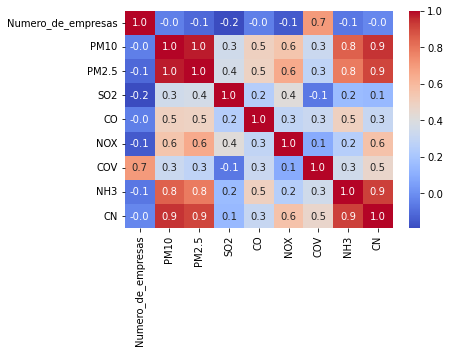

In [57]:
# Mostrar la matriz de correlación con corrplot
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

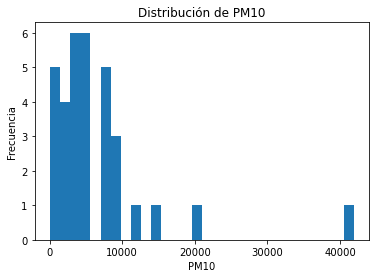

In [58]:
# Histograma de la variable PM10
plt.hist(data_numerico['PM10'].dropna(), bins=30)
plt.xlabel('PM10')
plt.ylabel('Frecuencia')
plt.title('Distribución de PM10')
plt.show()

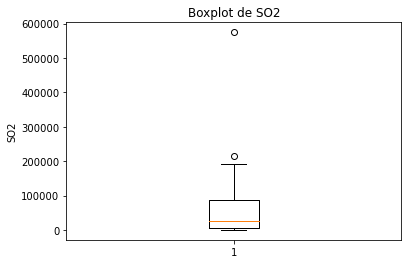

In [59]:
# Boxplot de la variable SO2 para identificar valores atípicos
plt.boxplot(data_numerico['SO2'].dropna())
plt.ylabel('SO2')
plt.title('Boxplot de SO2')
plt.show()

In [60]:
#################################### 3. Identificación de Valores Faltantes

# Identificar valores faltantes
missing_values = data.isna().sum()

# Porcentaje de valores faltantes
missing_percent = data.isna().mean() * 100

# Crear un DataFrame con la información
missing_data = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Values': missing_values.values,
    'Missing_Percent': missing_percent.values
})

# Mostrar columnas con valores faltantes
missing_data = missing_data[missing_data['Missing_Values'] > 0]
print(missing_data)

               Column  Missing_Values  Missing_Percent
2   Estado_emergencia               5        15.151515
4               PM2.5               3         9.090909
7                 NOX               8        24.242424
9                 NH3               2         6.060606
10                 CN              10        30.303030


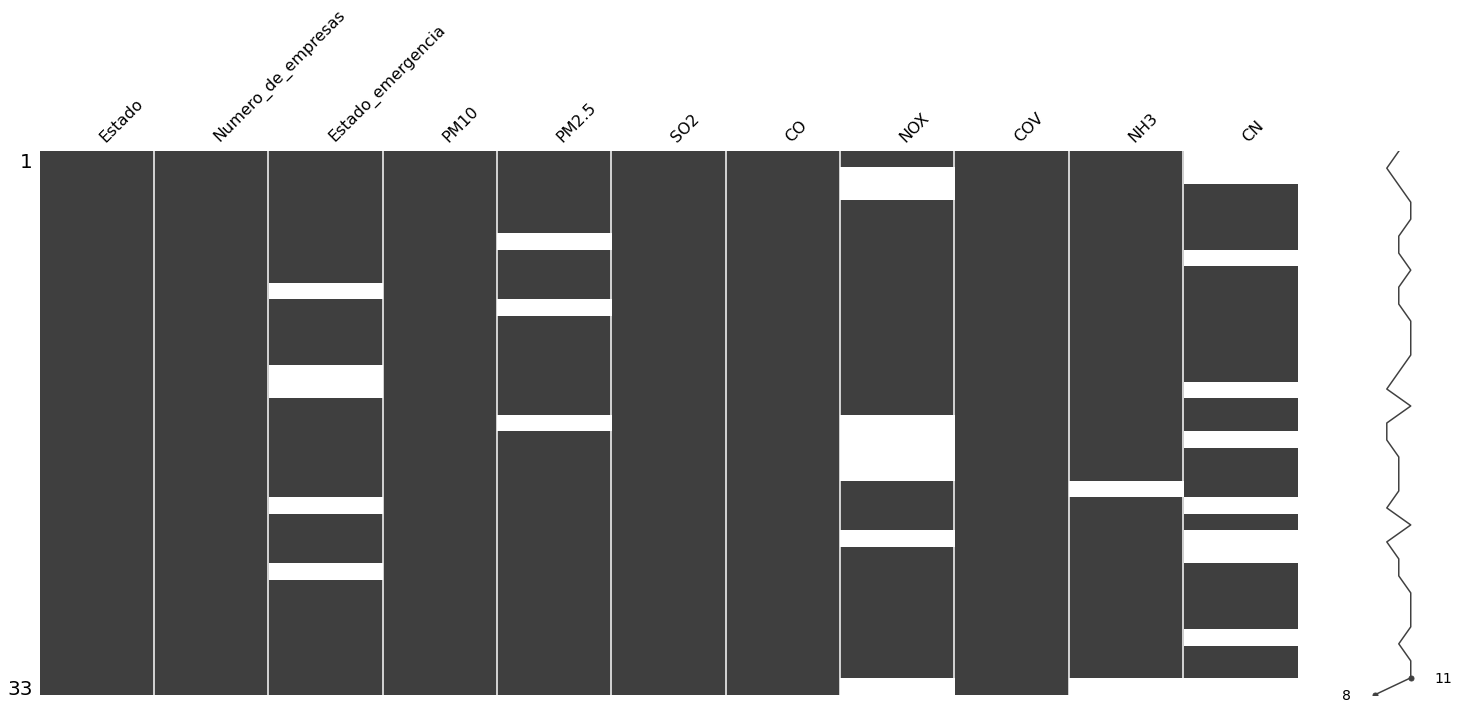

In [61]:
# Crear la visualización de valores faltantes
msno.matrix(data)
plt.show()

In [62]:
################################### 4. Tratamiento de Valores Faltantes

# Eliminar filas con valores faltantes
data_clean = data.dropna(); data_clean

,Estado,Numero_de_empresas,Estado_emergencia,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
3,Campeche,39,SI,4527,3847.0,574973,8698,34132.0,3465,382.0,356.0
4,Coahuila,214,NO,5063,3083.0,54592,2510,4845.0,3419,912.0,812.0
7,Chihuahua,367,SI,8207,4958.0,166476,1767,20578.0,1296,449.0,508.0
10,Guanajuato,233,SI,3810,2770.0,48462,74299,9249.0,10155,1137.0,171.0
11,Guerrero,8,NO,8215,7725.0,104172,2327,11206.0,708,88.0,451.0
12,Hidalgo,129,SI,12532,8977.0,216611,115085,31484.0,7567,322.0,370.0
15,Michoacán,151,NO,5095,3460.0,13717,2856,4303.0,5379,1957.0,379.0
22,Quintana Roo,11,NO,2076,1199.0,566,349,512.0,866,387.0,348.0
26,Tabasco,179,NO,7986,5116.0,75004,3732,13328.0,4093,327.0,259.0
27,Tamaulipas,104,NO,3612,2501.0,14118,6911,21139.0,6280,607.0,496.0


In [63]:
# O eliminar columnas con demasiados valores faltantes (por ejemplo, más del 25%)
data_clean = data.drop(columns=missing_data[missing_data['Missing_Percent'] > 25]['Column']);data_clean

,Estado,Numero_de_empresas,Estado_emergencia,PM10,PM2.5,SO2,CO,NOX,COV,NH3
0,Aguascalientes,0,SI,945,629.0,1814,235,843.0,1836,14.0
1,Baja California,588,NO,1978,1842.0,5588,6850,NaN,11692,254.0
2,Baja California Sur,27,NO,1028,752.0,22890,505,NaN,516,115.0
3,Campeche,39,SI,4527,3847.0,574973,8698,34132.0,3465,382.0
4,Coahuila,214,NO,5063,3083.0,54592,2510,4845.0,3419,912.0
5,Colima,34,NO,3360,NaN,33287,9505,11015.0,4741,264.0
6,Chiapas,42,SI,19963,16177.0,190970,24171,158743.0,6202,1220.0
7,Chihuahua,367,SI,8207,4958.0,166476,1767,20578.0,1296,449.0
8,Distrito Federal,1569,NaN,1381,826.0,699,766,2217.0,21967,50.0
9,Durango,80,NO,2971,NaN,27144,2930,6645.0,3156,157.0


In [64]:
# Función para calcular la moda
def get_mode(v):
    return v.mode()[0]

In [65]:
# Imputación para columnas numéricas con la mediana y para columnas categóricas con la moda
data_imputed = data.copy()

# Imputación de variables numéricas con la mediana
for col in data_imputed.select_dtypes(include=[np.number]).columns:
    data_imputed[col].fillna(data_imputed[col].median(), inplace=True)

# Imputación de variables categóricas con la moda
for col in data_imputed.select_dtypes(include=['object', 'category']).columns:
    data_imputed[col].fillna(get_mode(data_imputed[col]), inplace=True)


In [66]:
############################################# Resultado Final

# Verificar el resultado final
#data_imputed.describe()
data_imputed

,Estado,Numero_de_empresas,Estado_emergencia,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
0,Aguascalientes,0,SI,945,629.0,1814,235,843.0,1836,14.0,370.0
1,Baja California,588,NO,1978,1842.0,5588,6850,10184.0,11692,254.0,370.0
2,Baja California Sur,27,NO,1028,752.0,22890,505,10184.0,516,115.0,58.0
3,Campeche,39,SI,4527,3847.0,574973,8698,34132.0,3465,382.0,356.0
4,Coahuila,214,NO,5063,3083.0,54592,2510,4845.0,3419,912.0,812.0
5,Colima,34,NO,3360,3543.5,33287,9505,11015.0,4741,264.0,137.0
6,Chiapas,42,SI,19963,16177.0,190970,24171,158743.0,6202,1220.0,370.0
7,Chihuahua,367,SI,8207,4958.0,166476,1767,20578.0,1296,449.0,508.0
8,Distrito Federal,1569,NO,1381,826.0,699,766,2217.0,21967,50.0,23.0
9,Durango,80,NO,2971,3543.5,27144,2930,6645.0,3156,157.0,166.0


In [67]:
## /// Otro método de imputación (Vecinos más cercanos)

from sklearn.preprocessing import LabelEncoder

data_imputed_knn = data.copy()

# Separar la primera columna (para ignorarla durante la imputación)
first_column = data_imputed.iloc[:, 0]
data_without_first_col = data_imputed.iloc[:, 1:]

# Separar columnas numéricas y categóricas en los datos restantes
num_cols = data_without_first_col.select_dtypes(include=[np.number]).columns
cat_cols = data_without_first_col.select_dtypes(include=['object', 'category']).columns

# Codificar variables categóricas
le = LabelEncoder()
data_encoded = data_without_first_col.copy()
for col in cat_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))

# Imputación usando KNN para el DataFrame codificado
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed_encoded = pd.DataFrame(knn_imputer.fit_transform(data_encoded), columns=data_encoded.columns)
data_imputed_encoded

,Numero_de_empresas,Estado_emergencia,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
0,0.0,1.0,945.0,629.0,1814.0,235.0,843.0,1836.0,14.0,370.0
1,588.0,0.0,1978.0,1842.0,5588.0,6850.0,10184.0,11692.0,254.0,370.0
2,27.0,0.0,1028.0,752.0,22890.0,505.0,10184.0,516.0,115.0,58.0
3,39.0,1.0,4527.0,3847.0,574973.0,8698.0,34132.0,3465.0,382.0,356.0
4,214.0,0.0,5063.0,3083.0,54592.0,2510.0,4845.0,3419.0,912.0,812.0
5,34.0,0.0,3360.0,3543.5,33287.0,9505.0,11015.0,4741.0,264.0,137.0
6,42.0,1.0,19963.0,16177.0,190970.0,24171.0,158743.0,6202.0,1220.0,370.0
7,367.0,1.0,8207.0,4958.0,166476.0,1767.0,20578.0,1296.0,449.0,508.0
8,1569.0,0.0,1381.0,826.0,699.0,766.0,2217.0,21967.0,50.0,23.0
9,80.0,0.0,2971.0,3543.5,27144.0,2930.0,6645.0,3156.0,157.0,166.0


In [68]:
# Decodificar variables categóricas
for col in cat_cols:
    data_imputed_encoded[col] = le.inverse_transform(data_imputed_encoded[col].astype(int))

# Volver a incluir la primera columna en el DataFrame imputado
data_imputed_final = pd.concat([first_column, data_imputed_encoded], axis=1)

# Mostrar resumen de los datos imputados
print(data_imputed_final.describe())

       Numero_de_empresas          PM10         PM2.5            SO2  \
count           33.000000     33.000000     33.000000      33.000000   
mean           233.090909   6565.636364   4776.621212   67600.333333   
std            346.377356   7711.727059   4935.274226  109017.222432   
min              0.000000     40.000000    211.000000     286.000000   
25%             39.000000   2108.000000   1842.000000    5588.000000   
50%            129.000000   4556.000000   3543.500000   27144.000000   
75%            222.000000   8207.000000   5399.000000   86202.000000   
max           1569.000000  41938.000000  25779.000000  574973.000000   

                  CO            NOX           COV          NH3           CN  
count      33.000000      33.000000     33.000000    33.000000    33.000000  
mean    19171.636364   16641.030303   8096.242424   922.000000   559.121212  
std     34125.471294   27458.228202  10278.400976  1462.042151   935.754400  
min       235.000000     512.000000    

In [69]:
data_imputed_final

,Estado,Numero_de_empresas,Estado_emergencia,PM10,PM2.5,SO2,CO,NOX,COV,NH3,CN
0,Aguascalientes,0.0,SI,945.0,629.0,1814.0,235.0,843.0,1836.0,14.0,370.0
1,Baja California,588.0,NO,1978.0,1842.0,5588.0,6850.0,10184.0,11692.0,254.0,370.0
2,Baja California Sur,27.0,NO,1028.0,752.0,22890.0,505.0,10184.0,516.0,115.0,58.0
3,Campeche,39.0,SI,4527.0,3847.0,574973.0,8698.0,34132.0,3465.0,382.0,356.0
4,Coahuila,214.0,NO,5063.0,3083.0,54592.0,2510.0,4845.0,3419.0,912.0,812.0
5,Colima,34.0,NO,3360.0,3543.5,33287.0,9505.0,11015.0,4741.0,264.0,137.0
6,Chiapas,42.0,SI,19963.0,16177.0,190970.0,24171.0,158743.0,6202.0,1220.0,370.0
7,Chihuahua,367.0,SI,8207.0,4958.0,166476.0,1767.0,20578.0,1296.0,449.0,508.0
8,Distrito Federal,1569.0,NO,1381.0,826.0,699.0,766.0,2217.0,21967.0,50.0,23.0
9,Durango,80.0,NO,2971.0,3543.5,27144.0,2930.0,6645.0,3156.0,157.0,166.0
